# Péndulo con punto de suspensión libre

[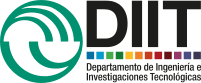](https://ingenieria.unlam.edu.ar/)    
[by-nc-sa_80x15.png](https://creativecommons.org/licenses/by-sa/4.0/deed.es_ES) 
2021 [Víctor A. Bettachini](mailto:vbettachini@unlam.edu.ar)  

---

> Bibliografía:
>- Sección 5 ($\S 5$) Ejercicio 2  
Mecánica  
Lev Davidovich Landau, y E. M. Lifshitz  
Reverté, 1994

## Enunciado
Un péndulo oscila en un plano de masa \\(m_2\\) cuyo punto de suspensión, de masa \\(m_1\\), puede desplazarse sobre una recta horizontal.  
1. Escriba la energía cinética, \\(T\\) y potencial, \\(V\\), en función de las coordenadas generalizadas sugeridas por las figura.
1. Verifique que al fijar la masa \\(m_1\\) recupera las expresiones de \\(T\\) y \\(V\\) de un péndulo ideal.  
![](figuras/landauS52_fig2.png "Figura 2 del libro de Landau.") 

## Coordenadas generalizadas
> Referencia:
> - [Landau](https://mega.nz/file/CQInnIzJ#WenBhiu1wz57v2ulGmgfrlKzgLoNSPh4HBzWYFGh6_4) $\S1$ "Coordenas generalizadas"
> - [Apunte Lanczos](https://github.com/bettachini/UNLaM_MecanicaGeneral/blob/master/apunteLanczos/apunteLanczos.pdf) $\S 2.2$ "Coordenadas generalizadas"

### Leer Lanczos $\S 2.2$, aquí un resumen
Para describir los $N$ grados de libertad usaremos $q_1, q_2,\dots,q_N$ **coordenadas generalizadas**.
- No necesariamente son las coordenadas en un sistema, e.g. $(\rho,\varphi, \theta)$ en el esférico.
- Pueden ser cualquier magnitud que nos permita determinar posiciones, e.g. una coordenada en el sistema cartesiano puede ser función de estas $x_1= f(q_1, q_2,\dots,q_N)$.

Sabemos que para describir la dinámica de un sistema no alcanza las con posiciones sino que necesitamos también las velocidades.
Así que nos interesarán también las **velocidades generalizadas**: $\dot{q}_1, \dot{q}_2,\dots,\dot{q}_N$.


### Coordenadas generalizadas de este sistema
Este sistema de $P=2$ partículas, de masas $m_1$ y $m_2$, debieran gozar de sus 3 **grados de libertad** en un mundo tridimensional.
La descripción de la dinámica de este sistema requiría de $3P= 6$ coordenadas para sus posiciones y también $3P$ velocidades.

Pero a las partículas les imponemos **restricciones que quitan grados de libertad**:
1. El movimiento se limita al plano $\rightarrow$ dos restricciones.
2. La partícula $1$ está engarzada en la corredera horizontal $\rightarrow$ una restricción.
3. La $2$ no tiene más remedio que estar separada en $\ell$ de $1$ $\rightarrow$ otra restricción.

Un total de $K=4$ restricciones, que reducen los grados de libertad del sistema a $3P-K= 2$.
Es decir que con solo $2$ coordenadas generalizadas (y sus respectivas derivadas en el tiempo) habremos definido la dinámica del sistema.

### Coordenadas generalizadas y sistema cartesiano

Para este primer ejemplo haremos algo muy mecanicista al usar un sistema de coordenadas cartesiano y sus versores.
Usualmente podríamos escribir la velocidad al cuadrado de cada cuerpo con la expresión de la velocidad en los distintos sistemas que conocemos.

La figura que acompaña a este problema nos sugiere dos coordenadas generalizadas.
Ubicar la $m_1$ sobre el eje $x$ permite determinar su posición solo con una, $x$,
$$
\begin{aligned}
\vec{r}_1 
&= x \hat{x}.
\end{aligned}
$$

In [1]:
import sympy as sym # importamos funciones de cálculo simbólico
from sympy.physics import mechanics as mech # de sympy utilizaremos funciones de mecánica
mech.init_vprinting() # notación con punto para la velocidad y punto punto para la aceleración
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Defino los parámetros físicos del sistema
m1, m2, g, l = sym.symbols('m_1, m_2, g, \ell', positive=True)

# Defino coordenadas generalizadas
N = mech.ReferenceFrame('N') # marco referencial o en coordenadas cartesianas
t = sym.symbols('t') # tiempo
x = sym.Function('x')(t)

In [3]:
m1_r = x* N.x
m1_r

La partícula con $m_2$ necesita también de $\varphi$ como coordenada,
$$
\begin{aligned}
\vec{r}_2 
&= \vec{r}_1 + \ell \left( \sin{\varphi} \hat{x} +  \cos{\varphi} (- \hat{y}) \right) \\
&= \left( x + \ell \sin{\varphi} \right) \hat{x} + (-\ell \cos{\varphi}) \hat{y}.
\end{aligned}
$$

In [4]:
phi = sym.Function(r'\varphi')(t)
m2_r = (x + l* sym.sin(phi) )* N.x + (- l* sym.cos(phi) )* N.y  # recordemos que tomamos y hacia arriba
m2_r

## Energía cinética
En coordenadas cartesianas 
La energía cinética de una partícula de masa $m$ es $T= \frac{m}{2} \left(\dot{\vec{r}}\right)^2 = \frac{m}{2} \left(\dot{\vec{r}} \cdot \dot{\vec{r}}\right) = \frac{m}{2} \left(\dot{r_i}^2+ \dot{r_j}^2+ \dot{r_k}^2 \right)$.

Habrá que hacer uso del sistema de coordenas que facilite más la tarea.
En este ejercicio son las cartesianas en el cuál es muy sencillo escribir esta energía como $T= \frac{m}{2} \left(\dot{x}^2+ \dot{y}^2+ \dot{z}^2 \right)$.

Para este sistema
$$
T = \sum_{i=1}^{P=2} \frac{m_i}{2} \left( \dot{\vec{r}}_i \right)^2 = \frac{m_1}{2} \left( \dot{\vec{r}}_1 \right)^2 + \frac{m_2}{2} \left( \dot{\vec{r}}_2 \right)^2
$$

### Velocidades
`Python`, como cualquier otro lenguaje de programación es capaz hacer cuentas como una calculadora.
Esto se llama cálculo numérico.

Como en otros otros lenguajes pueden agregarse paquetes de funciones.
Estos que se suelen llamar bibliotecas, en `Python` se llaman módulos.

El módulo `sympy` provee funciones para resolver cuestiones de análisis y álgebra en forma simbólica.
Por ejemplo para derivar funciones como las $\dot{\vec{r}}_i$.
$$
\dot{\vec{r}}_1 = \dot{x} \hat{x}
$$

In [5]:
m1_v= m1_r.diff(t, N) # derivada con t en el sistema de referencia N
m1_v

$$
\dot{\vec{r}}_2 = \left( \dot{x} + \ell \cos{\varphi} \dot{\varphi} \right) \hat{x} + \left( \ell \sin{\varphi} \dot{\varphi} \right) \hat{y} .
$$

In [6]:
m2_v= m2_r.diff(t, N)
m2_v

Y ahora con estos $\left( \dot{\vec{r}}_i \right)^2$
$$
\left(\dot{\vec{r}}_1 \right)^2 = \dot{\vec{r}}_1 \cdot \dot{\vec{r}}_1 = \dot{x}^2
$$

In [7]:
# velocidades al cuadrado es decir producto punto con si mismo
m1_v_cuadrado = m1_v.dot(m1_v)
m1_v_cuadrado

$$
\begin{aligned}
\left(\dot{\vec{r}}_2 \right)^2= \dot{\vec{r}}_2 \cdot \dot{\vec{r}}_2 
&= \left( \dot{x} + \ell \cos{\varphi} \dot{\varphi} \right)^2 + \left( \ell \sin{\varphi} \dot{\varphi} \right)^2 \\
&= \left( \dot{x}^2 + 2 \dot{x}_1 \ell \cos{\varphi} \dot{\varphi} + \ell^2 \cos^2{\varphi} \dot{\varphi}^2 \right) + \left( \ell^2 \sin^2{\varphi} \dot{\varphi}^2 \right) \\
&= \dot{x}^2 + 2 \dot{x}_1 \ell \cos{\varphi} \dot{\varphi} + \ell^2 \dot{\varphi}^2 . 
\end{aligned}
$$

In [8]:
m2_v_cuadrado = m2_v.dot(m2_v)
m2_v_cuadrado

Con esto la energía cinética queda
$$
\begin{aligned}
T(\dot{x}_1, \varphi, \dot{\varphi}) &= \frac{m_1}{2} \left( \dot{\vec{r}}_1 \right)^2 + \frac{m_2}{2} \left( \dot{\vec{r}}_2 \right)^2 \\
& = \frac{m_1}{2} \dot{x}^2 + \frac{m_2}{2} \left( \dot{x}^2 + 2 \dot{x} \ell \cos{\varphi} \dot{\varphi} + l^2 \dot{\varphi}^2 \right) \\
\end{aligned}
$$

In [9]:
# Energía cinética
unMedio = sym.Rational(1,2) # Rational: fracción de enteros, alternativamente podría haberse usado 0.5 
m1_T = unMedio* m1* m1_v_cuadrado
m2_T = unMedio* m2* m2_v_cuadrado
T = sym.Eq(sym.Symbol('T'), (m1_T + m2_T) ) # simplify: simplifica usando factor común y otras operaciones
T

## Energía potencial
A veces el potencial es más sencillo de determinar partiendo de las fuerzas identificas en el sistema que depende de los campos que actuan sobre el mismo.
En este problema está presente el campo gravitatorio responsable de la aceleración $\vec{g}= -g \hat{y}$ actuando sobre todas las $m_i$, causando sobre estas la fuerza peso $\vec{P}= m \vec{g}$.

La expresión más sencilla para calcular el potencial gravitatorio es
$$
V = - \vec{P} \cdot \vec{r}
$$

con lo que el potencial del sistema queda
$$
\begin{aligned}
V(\varphi)
&= -\vec{P}_1 \cdot \vec{r}_2 \\
&= - [m_2 (g (- \hat{y} ) ] \cdot (x_2 \hat{x} + y_2 \hat{y}) \\
&= - (- m_2 g\hat{y} ) \cdot ( y_2 \hat{y}) \\
&= (m_2 g) \hat{y} \cdot (-\ell \cos{\varphi}) \hat{y} \\
&= - m_2 g \ell \cos{\varphi}.
\end{aligned}
$$

In [11]:
m2_r,

In [10]:
# Energía potencial
m1_V = 0
m2_V = - (m2* g* (- N.y)).dot(m2_r)
V = sym.Eq(sym.Symbol('V'), (m1_V + m2_V ).simplify() )
V

## Recuperando el péndulo ideal
![](figuras/pénduloHorizontal.png)   
Un péndulo simple conviene trabajarlo en coordenadas cilíndricas.
En estas un péndulo rígido e ideal tiene una única componente no nula de su velocidad: la que vá en $\hat{\varphi}$ es decir $\dot{\vec{r}} \cdot \hat{\varphi}= \ell \dot{\varphi}$.
Así
$$
T= \frac{m}{2} \dot{\vec{r}}^2= \frac{m}{2} \ell^2 \dot{\varphi}^2.
$$



En la expresión de la energía cinética del sistema anterior no figura la coordenada generalizada de la $m_1$ que es $x$, la posición de la suspensión

In [11]:
T

Pero si figura la velocidad generalizada $\dot{x}$ que corresponde a esa coordenada.
Si el punto de suspensión estará fijado, evidentemente $\dot{x}$ debe ser $0$.

In [13]:
suspensiónFija_T = T.subs(x.diff(t), 0)
suspensiónFija_T

En esa expresión se puede obtener un factor común $\ell^2 \dot{\varphi}^2$ dejando entre paréntesis la suma del cuadrado del seno y la del coseno.
Esto como sabemos se simplifica en un $1$.

In [16]:
suspensiónFija_T.simplify()

Ahora si esta es la misma expresión de $T$ que la del péndulo ideal.

Si establecemos como en el sistema analizado $V(y_0)= 0$ el potencial gravitatorio es $V(y)= m g y$.
Puesto que usamos coordenadas cilíndricas $y= -\ell \cos{\varphi}$, por tanto
$$
V(\varphi)= -m g \ell \cos{\varphi}.
$$

Como ni $x_1$ ni $\dot{x}_1$ tienen ningún papel en la energía potencial esta es la misma en el péndulo que en este sistema. 